In [1]:
import numpy as np
from functools import reduce
from collections import namedtuple
from typing import List, Tuple, Union,Dict
import json
import re

MAXSIDE = 100
MAXAREA = 40 * 40
MAXPIXELS = 40 * 40 * 5

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'arclang')))
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from image import Image, Point
from function import *
# from dsl import *

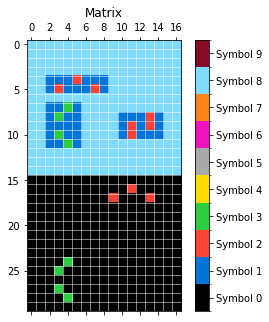

In [2]:
path = "../data/training/e6721834.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
m,n = img_mask.shape
input_img= Image(0,0,n,m,img_mask)
display_matrix(input_img)

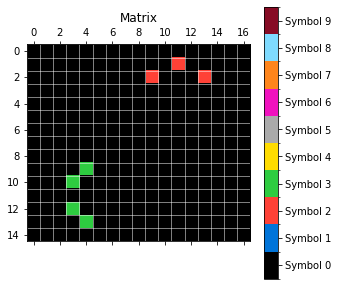

In [39]:
display_matrix(half(input_img,3))

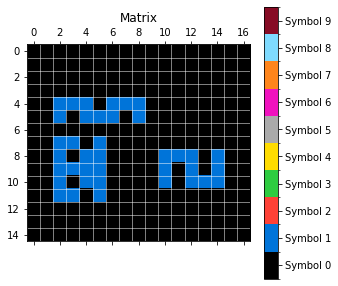

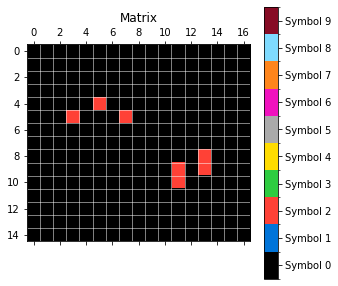

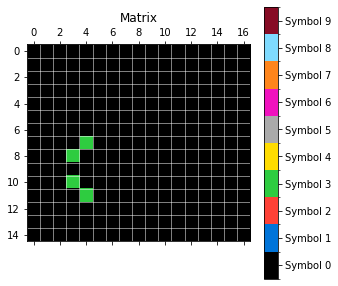

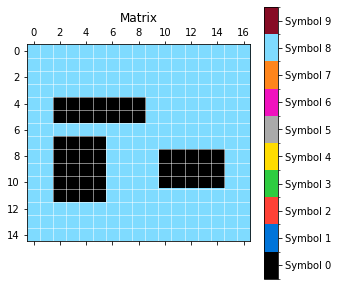

[None, None, None, None]

In [49]:
[display_matrix(i) for i in half(input_img,2).list_components("partition")]

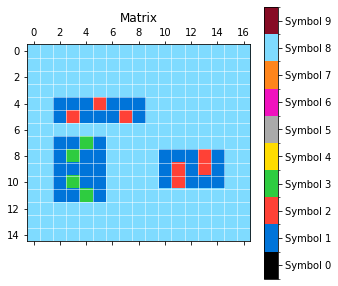

[None]

In [55]:
[display_matrix(i) for i in half(input_img,2).aggressive_connected_components(3)]

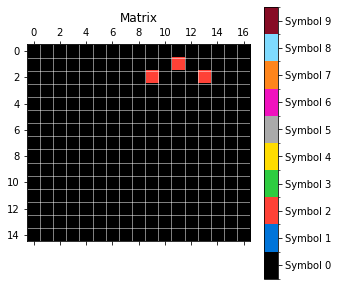

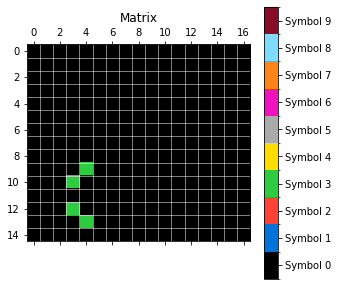

[None, None]

In [44]:
[display_matrix(i) for i in half(input_img,3).list_components("partition")]

AttributeError: 'list' object has no attribute 'mask'

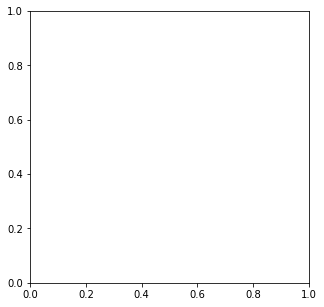

In [30]:
display_matrix(gravity(input_img,2))

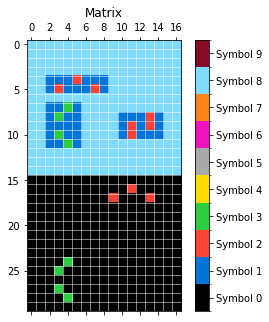

In [20]:
display_matrix(my_stack_l([input_img,input_img],1))

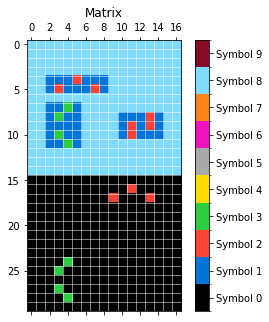

In [26]:
display_matrix(mirror(input_img,input_img,1))

In [58]:
print("""\nI am trying to find connected components in a binary image using scipy\'s label function. The code seems correct but it doesn\'t work as expected. Can you help me identify any mistakes or suggest improvements?nA: To help you debug and improve your code, let\'s go through the steps and ensure everything is correctly implemented. Your goal is to find connected components in a binary image using `scipy.ndimage.label` with different connectivities. Here\\u2019s a step-by-step breakdown of what should be done:\\n\\n1. **Ensure the mask is binary**: The input mask should consist of 0s and 1s where 1 represents the foreground (pixels belonging to the object).\\n\\n2. **Generate the structure element**: This determines the connectivity. For 4-connectivity, use `generate_binary_structure(2, 1)`, and for 8-connectivity, use `generate_binary_structure(2, 2)`.\\n\\n3. **Label the connected components**: Use `scipy.ndimage.label` to label the connected components in the binary image based on the generated structure element.\\n\\n4. **Extract and create Image objects**: Iterate over the labeled components and create `Image` objects for each component.\\n\\nHere\\u2019s a revised version of your code with comments explaining each step:\\n\\n```python\\nimport numpy as np\\nfrom scipy.ndimage import label, generate_binary_structure\\nfrom typing import List\\n\\nclass Image:\\n    def __init__(self, x, y, w, h, data):\\n        self.x = x\\n        self.y = y\\n        self.w = w\\n        self.h = h\\n        self.data = data\\n\\ndef aggressive_connected_components(self, connectivity=2) -> List[\\"Image\\"]:\\n    \'\'\'\\n    Find connected components with a more aggressive connectivity.\\n    \\n    :param connectivity: 1 for 4-connectivity, 2 for 8-connectivity, \\n                         can be increased for more aggressive connectivity\\n    :return: List of Image objects, each representing a component\\n    \'\'\'\\n    # Ensure the mask is binary (0s and 1s)\\n    if not np.all(np.logical_or(self.mask == 0, self.mask == 1)):\\n        raise ValueError(\\"Mask must be binary.\\")\\n    \\n    # Generate the structure element for the given connectivity\\n    struct = generate_binary_structure(2, connectivity)\\n    \\n    # Label the connected components\\n    labeled_array, num_features = label(self.mask > 0, structure=struct)\\n    \\n    components = []\\n    for i in range(1, num_features + 1):\\n        component = np.where(labeled_array == i, self.mask, 0)\\n        components.append(Image(self.x, self.y, self.w, self.h, component))\\n    \\n    return components\\n```\\n\\n### Key Points to Check:\\n1. **Binary Mask**: Ensure the mask is binary (contains only 0s and 1s). If it contains other values, you might need to preprocess the mask accordingly.\\n2. **Connectivity Parameter**: The `connectivity` parameter should be either 1 for 4-connectivity or 2 for 8-connectivity in a 2D image. Higher values can be used if needed but are less common and typically require custom structures.\\n3. **Labeling Function**: Ensure that the labeling function (`label`) is correctly identifying connected components based on the specified connectivity.\\n\\n### Example Usage:\\nTo use this function, you need to have an instance of `Image` with a `.mask` attribute representing the binary image and other necessary attributes like position and size. Here\\u2019s how you might call it:\\n\\n```python\\n# Assuming img is an instance of Image class with mask set\\ncomponents = aggressive_connected_components(img, connectivity=2)\\nfor component in components:\\n    print(\\"Component:\\", component.data)  # Print the binary image of each component\\n```\\n\\nThis should help you identify and fix any issues with your connected components extraction code.""".replace("\\n","\n"))


I am trying to find connected components in a binary image using scipy's label function. The code seems correct but it doesn't work as expected. Can you help me identify any mistakes or suggest improvements?nA: To help you debug and improve your code, let's go through the steps and ensure everything is correctly implemented. Your goal is to find connected components in a binary image using `scipy.ndimage.label` with different connectivities. Here\u2019s a step-by-step breakdown of what should be done:

1. **Ensure the mask is binary**: The input mask should consist of 0s and 1s where 1 represents the foreground (pixels belonging to the object).

2. **Generate the structure element**: This determines the connectivity. For 4-connectivity, use `generate_binary_structure(2, 1)`, and for 8-connectivity, use `generate_binary_structure(2, 2)`.

3. **Label the connected components**: Use `scipy.ndimage.label` to label the connected components in the binary image based on the generated structu